In [1]:
DATA_FILEPATH = '/casa/haedong/project/dicer_motif/for_publication/representative_pre_mirnas.xlsx'

In [2]:
CODE2SPECIES = {
    'hsa': 'Human',
    'dre': 'Zebrafish',
    'cin': 'Vase tunicate',
    'aga': 'Mosquito',
    'dme': 'Fruit fly',
    'dpu': 'Water flea',
    'cel': 'C. elegans',
    'cbr': 'C.briggsae',
    'ppc': 'P. pacificus',
    'cte': 'Polychaete worm',
    'lgi': 'Sea snail',
    'sme': 'Planarian',
    'nve': 'Sea anemone'
}

In [3]:
score_3bp = pd.read_table('/casa/haedong/project/dicer_motif/for_publication/cleavage_score.minus1_to_1_randomization.txt', index_col=0)
score_3bp.index = score_3bp.index.str.replace('U', 'T')
score_3bp

,count_let7a1_input,count_let7a1_10,count_let7a1_20,count_let7a1_30,count_mir374b_input,count_mir374b_10,count_mir374b_20,count_mir374b_30,cleavage_score_let7a1_10,cleavage_score_let7a1_20,cleavage_score_let7a1_30,cleavage_score_mir374b_10,cleavage_score_mir374b_20,cleavage_score_mir374b_30,cleavage_score_average_10,cleavage_score_average_20,cleavage_score_average_30,gym_score
CGC/GCG,1055,263,82,45,212,31,11,6,4.358202,15.199809,25.705927,5.141645,16.937334,29.181761,4.749923,16.068571,27.443844,100.000000
AGC/GCA,2098,561,179,82,3948,365,213,184,4.069335,13.931319,28.317931,8.334480,17.608406,20.471296,6.201908,15.769863,24.394614,98.141037
CGC/GCC,1232,168,90,57,4008,433,273,211,7.949205,16.187284,23.804675,7.135407,13.961503,18.135525,7.542306,15.074394,20.970100,93.812906
CAC/GTC,1026,169,71,32,2215,204,173,115,6.582166,17.040811,34.848467,8.350036,12.152544,18.320685,7.466101,14.596677,26.584576,90.839919
AAT/ATT,100,35,9,7,613,78,37,33,3.056794,12.066288,14.137043,6.003627,15.418121,17.318863,4.530211,13.742205,15.727953,85.522255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCT/TAT,623,1000,1351,1583,1746,1918,2649,3223,0.679200,0.551392,0.441120,0.703219,0.629062,0.519670,0.691209,0.590227,0.480395,3.673177
CTC/TGT,795,1363,1847,2026,1959,1826,2855,3129,0.635837,0.514592,0.439730,0.828686,0.654854,0.600540,0.732262,0.584723,0.520135,3.638925
CTC/TCT,673,997,1450,1600,2178,2467,3446,3874,0.735829,0.554938,0.471407,0.682000,0.603202,0.539281,0.708914,0.579070,0.505344,3.603744
CCT/TTT,601,870,1266,1339,2241,2539,3693,4362,0.753053,0.567639,0.503059,0.681827,0.579142,0.492811,0.717440,0.573391,0.497935,3.568399


In [4]:
LABEL_SCORE = 'gym_score'

seq2score = {}
for index, row in score_3bp.iterrows():
    seq2score[index] = row['gym_score']

In [5]:
pre_1, pre_2, pre_3 = 'pre_mirgenedb', 'pre_mirbase_v22', 'pre_bartel'
mature_3p_1, mature_3p_2 = '3p_mirgenedb', '3p_mirbase_v22'
data_dir = '/casa/haedong/data/mirna_representative_pre_in_diverse_species_rnastructure_{}_{}_{}'.format(pre_1.split('_', 1)[1], pre_2.split('_', 1)[1], pre_3.split('_', 1)[1])

In [12]:
mirna2pos = {}
for code in CODE2SPECIES:
    seq = pd.read_excel(DATA_FILEPATH, sheet_name=code)
    for index, row in seq.fillna('').iterrows():
        if (type(row['3p_position_manual']) == int) and (row[mature_3p_1] == '') and (row[mature_3p_2] == ''): raise ValueError()

        if row[pre_1] != '': pre = row[pre_1]
        elif row[pre_2] != '': pre = row[pre_2]
        elif row[pre_3] != '': pre = row[pre_3]
        else: raise ValueError()

        if row[mature_3p_1] != '': mirna2pos[row['mirna']] = pre.find(row[mature_3p_1][:15]) + 1
        elif row[mature_3p_2] != '': mirna2pos[row['mirna']] = pre.find(row[mature_3p_2][:15]) + 1
        elif type(row['3p_position_manual']) == int:
            mature_3p_manual_seq = row['pre_bartel'][row['3p_position_manual'] - 1:]
            mirna2pos[row['mirna']] = pre.find(mature_3p_manual_seq[:15]) + 1
        else: print(row['mirna'], row['3p_position_manual'])


summary = []
species2dataframe_3bp = {}
for code, species in CODE2SPECIES.items():
    seq = pd.read_excel(DATA_FILEPATH, sheet_name=code)

    dataframes = []
    for index, row in seq.iterrows():
        if row['mirna'] in mirna2pos: right_3p = mirna2pos[row['mirna']]
        else: continue
            
        species_code = row['mirna'].split('-')[0]

        pos2base = {}
        for line in open('{}/{}/fold.ct'.format(data_dir, row['mirna'].replace('-', '_'))):
            if 'ENERGY' in line: continue
            line = line.strip().split()
            pos2base[int(line[0])] = line[1]

        left2right = {}
        rights = []
        right_prev = 0
        lefts_mismatch = []
        for line in open('{}/{}/fold.ct'.format(data_dir, row['mirna'].replace('-', '_'))):
            if ('ENERGY' in line) or (len(line.split()) == 2): continue
            line = line.strip().split()

            left, right = int(line[0]), int(line[-2])
            if left in rights: break

            if right != 0:
                if (lefts_mismatch != []) and (len(lefts_mismatch) == (right_prev - right - 1)):
                    for n, (left_mismatch) in enumerate(lefts_mismatch):
                        left2right[left_mismatch] = (right_prev - n - 1)
                        rights.append(right_prev - n - 1)

                left2right[left] = right
                rights.append(right)
                right_prev = right
                lefts_mismatch = []

            else:
                lefts_mismatch.append(left)

        if len(left2right) == 0: print('no structure', row['mirna'], row['pre_bartel']); continue;

        left_stem_last, right_stem_last = 0, 0
        for left, right in left2right.items():
            if left <= 22:
                left_stem_last = left
                right_stem_last = right

        positions = list(left2right.keys()) + list(left2right.values())
        for left in range(left_stem_last + 1, 26, 1):
            diff = left - left_stem_last
            right = right_stem_last - diff

            if (left in pos2base) and (left not in left2right) and (left not in positions) and (left < right) and (right not in positions) and (right > 0):
                left2right[left] = right
                positions += [left, right]


        lines = []
        for right in range(right_3p - 5, right_3p + 4):
            left = 0
            for n, m in left2right.items():
                if m == right: left = n

            if (left != 0) and ((left - 2) in left2right) and ((left - 1) in left2right) and (left in left2right) and (right in left2right.values()) and ((right + 1) in left2right.values()) and ((right + 2) in left2right.values()):
                seq = '{}{}{}/{}{}{}'.format(pos2base[left - 2], pos2base[left - 1], pos2base[left], pos2base[left2right[left]], pos2base[left2right[left - 1]], pos2base[left2right[left - 2]])
                lines.append([right - right_3p, seq2score[seq.replace('U', 'T')]])

        if len(lines) == 0: print('no info in the window', row['mirna'], row['pre_bartel']); continue;
        df = pd.DataFrame(lines)
        df.columns = ['position', row['mirna']]
        df = df.set_index('position')
        dataframes.append(df)

    if dataframes == []: continue
    score = pd.concat(dataframes, axis=1)
    species2dataframe_3bp[species_code] = score
    score_average = pd.DataFrame(score.mean(1))
    score_average.columns = ['{} (n={})'.format(species, len(score.columns))]
    summary.append(score_average)

summary_3bp = pd.concat(summary, axis=1)
summary_3bp

hsa-mir-297 Not available
dre-mir-142b Ambiguous
dre-mir-451 Not available
cin-mir-155 Not available
cin-mir-4004 Not available
cin-mir-4005c Not available
cin-mir-4007 Not available
cin-mir-4016-2 Not available
cin-mir-4025 Not available
cin-mir-4089 Not available
cin-mir-4113 Not available
cin-mir-4114 Not available
cin-mir-4116 Not available
cin-mir-4120 Not available
cin-mir-4124 Not available
cin-mir-4134 Not available
cin-mir-4157 Not available
cin-mir-4158 Not available
cin-mir-4166 Not available
cin-mir-4171 Not available
cin-mir-4176 Not available
cin-mir-4178a Not available
cin-mir-4186 Not available
cin-mir-4190 Not available
cin-mir-4193 Not available
cin-mir-4196 Not available
cin-mir-4197 Not available
cin-mir-4198 Not available
cin-mir-4201 Not available
cin-mir-4205 Not available
cin-mir-4209 Not available
cin-mir-4213 Not available
cin-mir-4214 Not available
cin-mir-4219 Not available
aga-mir-1891 Not available
aga-mir-190 Not available
dme-mir-280 Not available
dme-mi

,Human (n=183),Zebrafish (n=79),Vase tunicate (n=207),Mosquito (n=50),Fruit fly (n=106),Water flea (n=38),C. elegans (n=91),C.briggsae (n=80),P. pacificus (n=54),Polychaete worm (n=90),Sea snail (n=53),Planarian (n=105),Sea anemone (n=28)
position,,,,,,,,,,,,,
-5,13.674364,8.193577,15.000920,15.528262,15.120761,13.724276,22.291051,26.631304,23.041719,14.262263,14.806137,20.555468,14.514213
-4,13.943894,12.671356,15.284089,14.012942,13.368769,13.148972,17.683752,21.653602,24.599527,13.300313,14.052678,20.806004,13.175457
-3,16.450921,14.493122,15.825162,15.134232,15.000408,15.075146,18.437430,18.057305,18.988198,13.929006,12.604492,21.579623,20.107463
-2,21.924625,20.899557,25.498282,23.512271,24.052448,24.174037,30.651801,31.417891,26.691991,23.928834,28.107730,23.989636,28.775020
-1,31.257746,30.828051,30.425123,34.399961,35.523622,34.441571,38.445516,36.837369,34.323188,31.526251,32.731045,28.253524,31.353540
0,24.465184,21.000225,21.041540,19.175629,19.682610,20.599098,20.926576,21.173265,17.631567,19.948174,25.393479,19.353333,26.254746
1,24.668305,26.698427,22.832170,25.171414,23.770825,28.383579,24.986513,25.115662,28.878214,27.963724,30.915810,23.094243,26.629309
2,26.533147,26.450016,25.332560,29.787050,24.477192,31.067212,28.177461,29.883335,23.894421,22.636020,27.968719,26.720769,21.399687
3,25.511453,25.757169,25.386658,27.484700,24.285825,25.262446,27.639574,25.694818,25.211963,23.965780,25.954120,27.735451,24.781272


In [ ]:
import seaborn as sns
sns.set(style='whitegrid', font='Helvetica')

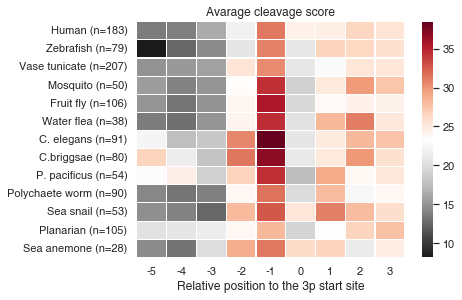

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, len(summary_3bp.T) / 3))

sns.heatmap(summary_3bp.T, square=False, linewidths=0.1, cmap='RdGy_r', annot=False,
            xticklabels=True, yticklabels=True, cbar=True, ax=ax)

ax.set_title('Avarage cleavage score')
ax.set_xlabel('Relative position to the 3p start site')

plt.savefig('/casa/haedong/project/dicer_motif/figure_files/210811_motif_conservation_relative_to_3p_start_site_after_manual_curation_pre_3p_combinations/{}_{}_{}.{}_{}.{}.average.pdf'.format(pre_1, pre_2, pre_3, mature_3p_1, mature_3p_2, LABEL_SCORE), format='pdf', bbox_inches='tight')